In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.9.2


[Original author](https://dev.mrdbourke.com/tensorflow-deep-learning/01_neural_network_regression_in_tensorflow/)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Create some linear data (a straight line) to model
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

In [ ]:
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

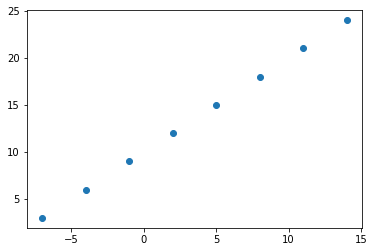

In [ ]:
# Visualize it
plt.scatter(X, y)

In [ ]:
# The same but with Tensors
# Neural networks accept numbers and outputs numbers. These numbers are typically represented as tensors (or arrays).
# Before we have created data using NumPy arrays, but we could do the same with tensors.


In [ ]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

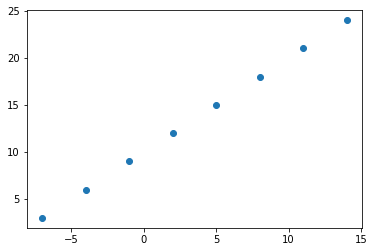

In [ ]:
# Visualize it
plt.scatter(X, y)

In [ ]:
# # Take a single example ox X
input_shape = X[0].shape

# # Take a single example of y
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [ ]:
# only 2 small lists of numbers
# This is a special kind of tensor, more specifically a rank 0 tensor or a scalar.

In [ ]:
# Let's take a look at the single examples individually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [ ]:
# Note: If you are using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to
# (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=1).
# Set random seed
tf.random.set_seed(42)

In [ ]:
# Create a model using the Sequential API
# tf.keras.layers.Dense(1): This line adds a dense (fully connected) layer to the model with 1 unit.
# The number of units defines the dimensionality of the output space.
# In this case, it's a single unit, so the layer will have a single weight (connection) to the input.
This model can be used for tasks like regression, where you're predicting a continuous value.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [ ]:
# Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics = ["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=1000)

# The tf.expand_dims function in TensorFlow is used to add an extra dimension to a tensor at a specified axis.
# In the context of model.fit, this is often used when the input data X is a one-dimensional array
#  (e.g., a vector representing a single feature) and needs to be reshaped to meet the input requirements of the neural network model.

Epoch 1/1000
1/1 [==============================] - 1s 891ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/1000
1/1 [=======================

In [ ]:
# Make a prediction with the model
model.predict([17.0])

# close to 27, but we can do better.

1/1 [==============================] - 0s 31ms/step


array([[27.97857]], dtype=float32)

In [ ]:
# Evaluate the model
# But first we create a bigger dataset and a new model we can use
# Make bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
# Split data into training/test set
# Check how many samples we have
len(X)

50

In [ ]:
X_train = X[:40] # first 40 examples (80% of the data)
y_train = y[:40]

In [ ]:
X_test = X[40:] # last 10 examples (20% of the data)
y_test = y[40:]

In [ ]:
len(X_train), len(X_test)

(40, 10)

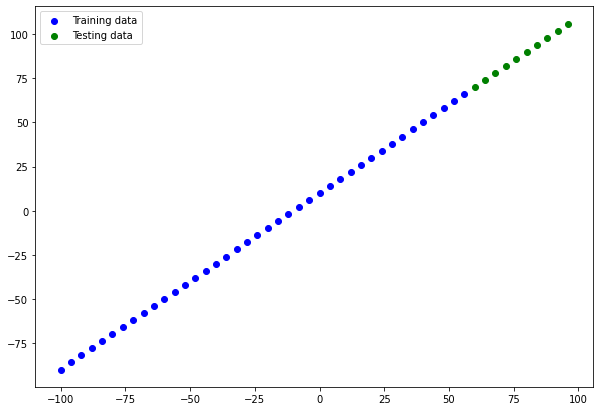

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [ ]:
# Set random seed
tf.random.set_seed(42)

In [ ]:
# Create a model using the Sequential API (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # Define the input shape to our model
])

In [ ]:
# Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit model (same as above)
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 45ms/step


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training in blue
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

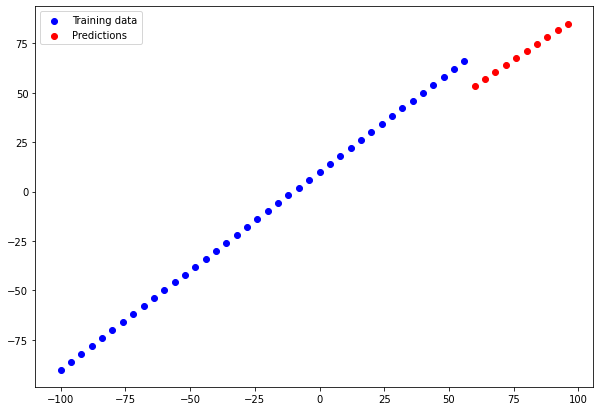

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)
# In our case, since we used MAE for the loss function as well as MAE for the metrics, model.evaluate() returns both the same

1/1 [==============================] - 0s 25ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [ ]:
# Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()) # squeeze to make the same shape

In [ ]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [ ]:
# Calculate MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())

In [ ]:
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

Build model 2  
This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping ecevrything else the same.

In [ ]:
# set random seed
tf.random.set_seed(42)

In [ ]:
# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) # Add a second layer
])

In [ ]:
# Compile the model (same as above)
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Fit the model to the training data
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 38ms/step


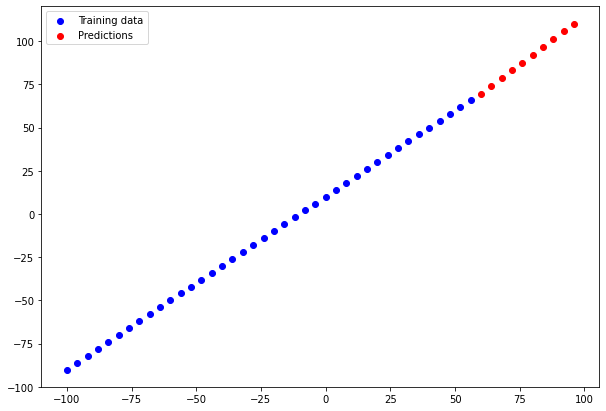

In [ ]:
plot_predictions(predictions=y_preds_2)

In [ ]:
# Woah, that's looking better already! And all it took was an extra layer.

In [ ]:
# Compute  model_2 metrics
def mae(y_test, y_pred):
  """
  Computes mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test, y_pred)

In [ ]:
def mse(y_test, y_pred):
  """
  Computes mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)


In [ ]:
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()

In [ ]:
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()

In [ ]:
mae_2, mse_2

(1.9097328, 5.45877)

In [ ]:
# Save the model using SavedModel format
model_2.save('best_model_SavedModel_format')